## HW6-2
#### Cliff Walking Example (w/ SARSA & Q-learning)

#### 1. Initailizing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# hparams
ALPHA = 0.5
GAMMA = 1 # undiscounted
EPSILON = 0.1
ROW = 4
COL = 12
M = 4
ACTIONS = ["right", "down", "up", "left"]

START = (3, 0)
GOAL = (3, 11)

#### 2. Functions

In [2]:
def argmax_q(q, i, j):
  _argmax = 0
  q_value = q[i][j][_argmax]
  for a in range(M):
    if q[i][j][a] > q_value:
      _argmax = a
      q_value = q[i][j][a]
  return _argmax

def epsilon_greedy(q, S, eps):
  if np.random.choice([True, False], p=[eps, 1 - eps]):
    return np.random.choice([0, 1, 2, 3])
  else:
    return argmax_q(q, S[0], S[1])

def move(cur_pos, action):

  def bound_check(r, c):
    if r < 0: r = 0
    if ROW - 1 < r: r = ROW - 1
    if c < 0: c = 0
    if COL - 1 < c: c = COL - 1
    return r, c
  
  x, y = cur_pos
  if action == 0:
    n_x, n_y = bound_check(x, y + 1)
  elif action == 1:
    n_x, n_y = bound_check(x + 1, y)
  elif action == 2:
    n_x, n_y = bound_check(x - 1, y)
  elif action == 3:
    n_x, n_y = bound_check(x, y - 1)

  if n_x == 3 and (0 < n_y > COL - 1):
    reward = -100
    n_x, n_y = START
  else:
    reward = -1

  return (n_x, n_y), reward

#### 3. Models

In [3]:
def sarsa(q, episodes=200):
  plot_data = []
  step = 1
  for ep in range(episodes):  # loop for each episode
    S = START # initialize S
    A = epsilon_greedy(q, S, EPSILON) # choose A from S using epsilon greedy
    total_reward = 0
    sub_step = 0
    while True: # loop for each step of episode
      if S == GOAL:
        break
      S2, reward = move(S, A) # take action A, observe S', R
      A2 = epsilon_greedy(q, S2, EPSILON) # choose A' from S' using epsilon greedy
      q[S[0]][S[1]][A] = q[S[0]][S[1]][A] + ALPHA * (reward + GAMMA * q[S2[0]][S2[1]][A2] - q[S[0]][S[1]][A])
      S, A = S2, A2
      step += 1
      total_reward += reward
      sub_step += 1
    # print(f"episode: {ep + 1}, step: {step}")
    plot_data.append(total_reward)
  print(f"total time steps: {step} [SARSA]")
  return plot_data

def q_learning(q, episodes=200):
  
  def max_q(S_):
    _max = q[S_[0]][S_[1]][0]
    for a in range(1, M):
      if q[S_[0]][S_[1]][a] > _max:
        _max = q[S_[0]][S_[1]][a]
    return _max

  plot_data = []
  step = 1
  for ep in range(episodes):  # loop for each episode
    S = START # initialize S
    total_reward = 0
    while True: # loop for each step of episode
      if S == GOAL:
        break
      A = epsilon_greedy(q, S, EPSILON) # choose A from S using epsilon greedy
      S2, reward = move(S, A) # take action A, observe S', R
      q[S[0]][S[1]][A] = q[S[0]][S[1]][A] + ALPHA * (reward + GAMMA * max_q(S2) - q[S[0]][S[1]][A])
      S = S2
      step += 1
      total_reward += reward
    # print(f"episode: {ep + 1}, step: {step}")
    plot_data.append(total_reward)
  print(f"total time steps: {step} [Q-learning]")
  return plot_data

#### 4. Run

total time steps: 9360 [SARSA]
total time steps: 8581 [Q-learning]
total time steps: 9444 [SARSA]
total time steps: 8583 [Q-learning]
total time steps: 9022 [SARSA]
total time steps: 8456 [Q-learning]
total time steps: 9472 [SARSA]
total time steps: 8547 [Q-learning]
total time steps: 9192 [SARSA]
total time steps: 8600 [Q-learning]
total time steps: 9345 [SARSA]
total time steps: 8505 [Q-learning]
total time steps: 9238 [SARSA]
total time steps: 8480 [Q-learning]
total time steps: 9302 [SARSA]
total time steps: 8551 [Q-learning]
total time steps: 9432 [SARSA]
total time steps: 8557 [Q-learning]
total time steps: 9161 [SARSA]
total time steps: 8534 [Q-learning]


<function matplotlib.pyplot.show>

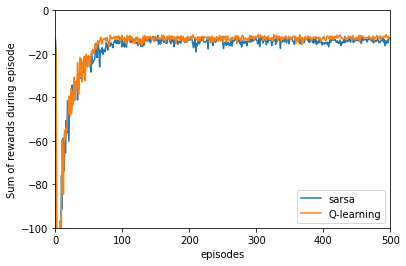

In [4]:
S_list = []
Q_list = []
NUM_EPISODE = 500
for e in range(10):
  Q = np.zeros((ROW, COL, M))
  s_res = sarsa(Q, episodes=NUM_EPISODE)
  S_list.append(s_res)

  Q = np.zeros((ROW, COL, M))
  q_res = q_learning(Q, episodes=NUM_EPISODE)
  Q_list.append(q_res)

epi = [x for x in range(NUM_EPISODE)]
S_list = np.array(S_list).mean(axis=0)
Q_list = np.array(Q_list).mean(axis=0)

plt.plot(epi, S_list, label="sarsa")
plt.plot(epi, Q_list, label="Q-learning")
plt.legend(loc="lower right")
plt.axis([0, NUM_EPISODE, -100, 0])
plt.ylabel("Sum of rewards during episode")
plt.xlabel("episodes")
plt.show

#### 5. Discussion
- 각각 10번의 실험 결과를 평균내서 plot 해본 결과이다.  
- 교과서의 설명과는 다르게 SARSA와 Q-learning 모두 비슷하게 수렴한다.